## Analysis of Robinhood Portfolio (robin_$tocks)

Project by: Pete Aguirre II

In this project, I will do a retuern:risk analysis on my current Robinhood stock portfolio with the help of multiple 
tools using:
- Python 3
- Jupyter Lab/Notebook
- Beautiful Soup
- Markowitz Efficent Frontier

## TO DO LIST:
- Create a daily, weekly, quarterly, yearly portfolio performance
- Learn how to create beatiful graphs
- Create interactive dashboards 
- Learn Monte Carlo Simulations

In [1]:
# Installing libraries 
# pip install pandas
# pip install numpy
# pip install matplotlib
# pip install robin_stocks

# Libraries Used 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import robin_stocks as r 
import pyotp

from pandas_datareader import data as wb

# Magic
%matplotlib inline

## 1.) Data Collection (updated)
Notes: Log in with Robinhood and portfolio will be gathered automatically

In [ ]:
# Robinhood Log In 
email = input("Enter email: ")
password = input("Enter password: ")

totp = pyotp.TOTP("My2factorAppHere").now()
log_in = r.login(email, password, expiresIn=500, by_sms=True, mfa_code=totp)

# Get stocks value
stonks = r.build_holdings()

# Logout 
# r.logout()

In [3]:
stonks = r.build_holdings()

In [4]:
# Company tickers
# Since the company tickers are the keys, and the other variables are values, 
# create a dataframe for symbols first.
symbols_df = []
for k in  stonks.keys():
    symbols_df.append(k)
symbols_df = np.array(symbols_df)
symbols_df = pd.DataFrame(symbols_df, columns=['Symbol'])
symbols_df

,Symbol
0,AMZN
1,AAPL
2,TSLA
3,JNJ
4,KO
5,BABA
6,JD
7,V
8,DAL
9,AGNC


In [5]:
# Other headers 
# Create a dataframe for the other headers (which are values to the symbol keys).
# Drop some variables: percent_change, equity_change, type, and id 
# Rename the variables to something nicer looking
variables_df = pd.DataFrame.from_dict(stonks.values())
variables_df = variables_df.drop(['percent_change', 'equity_change', 'id', 'percentage'], axis=1)
variables_df = variables_df.rename(columns={'price':'Price', 'quantity':'Quantity', 'average_buy_price':'Average Price', 'equity':'Equity', 'name':'Name', 'pe_ratio':'P/E', 'type':'Type'})
variables_df

,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,3291.3111,4154.72,Amazon,130.689000,3402.000000,1.22125800,stock
1,106.6538,5020.00,Apple,38.005000,125.500000,40.00000000,stock
2,351.0060,2216.99,Tesla,1165.110000,443.398000,5.00000000,stock
3,151.5325,2233.72,Johnson & Johnson,26.889100,153.420000,14.55951200,stock
4,47.4418,489.12,Coca-Cola,22.681500,49.830000,9.81580500,stock
5,246.0856,1443.70,Alibaba,30.054400,288.740000,5.00000000,adr
6,74.8302,543.34,JD.com,38.517600,79.860000,6.80369300,adr
7,208.3975,651.58,Visa,41.194300,215.880000,3.01827100,stock
8,28.8187,168.83,Delta Air Lines,None,31.950000,5.28407000,stock
9,13.9372,66.43,AGNC Investment,None,14.140000,4.69816500,reit


## 2.) Data Cleaning

In [6]:
# Concatinate both DataFrames 
my_portfolio = pd.concat([symbols_df, variables_df], axis=1)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3291.3111,4154.72,Amazon,130.689000,3402.000000,1.22125800,stock
1,AAPL,106.6538,5020.00,Apple,38.005000,125.500000,40.00000000,stock
2,TSLA,351.0060,2216.99,Tesla,1165.110000,443.398000,5.00000000,stock
3,JNJ,151.5325,2233.72,Johnson & Johnson,26.889100,153.420000,14.55951200,stock
4,KO,47.4418,489.12,Coca-Cola,22.681500,49.830000,9.81580500,stock
5,BABA,246.0856,1443.70,Alibaba,30.054400,288.740000,5.00000000,adr
6,JD,74.8302,543.34,JD.com,38.517600,79.860000,6.80369300,adr
7,V,208.3975,651.58,Visa,41.194300,215.880000,3.01827100,stock
8,DAL,28.8187,168.83,Delta Air Lines,None,31.950000,5.28407000,stock
9,AGNC,13.9372,66.43,AGNC Investment,None,14.140000,4.69816500,reit


In [7]:
# Check variable types
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
Symbol           10 non-null object
Average Price    10 non-null object
Equity           10 non-null object
Name             10 non-null object
P/E              8 non-null object
Price            10 non-null object
Quantity         10 non-null object
Type             10 non-null object
dtypes: object(8)
memory usage: 720.0+ bytes


In [8]:
# Change some values to floats and round them to 2 decimal numbers
my_portfolio['Price'] = my_portfolio['Price'].astype(float)
my_portfolio['Quantity'] = my_portfolio['Quantity'].astype(float).astype(int)
my_portfolio['Average Price'] = round(my_portfolio['Average Price'].astype(float), 2)
my_portfolio['Equity'] = round(my_portfolio['Equity'].astype(float), 2)
my_portfolio['P/E'] = round(my_portfolio['P/E'].astype(float),2)
my_portfolio

,Symbol,Average Price,Equity,Name,P/E,Price,Quantity,Type
0,AMZN,3291.31,4154.72,Amazon,130.69,3402.000,1,stock
1,AAPL,106.65,5020.00,Apple,38.01,125.500,40,stock
2,TSLA,351.01,2216.99,Tesla,1165.11,443.398,5,stock
3,JNJ,151.53,2233.72,Johnson & Johnson,26.89,153.420,14,stock
4,KO,47.44,489.12,Coca-Cola,22.68,49.830,9,stock
5,BABA,246.09,1443.70,Alibaba,30.05,288.740,5,adr
6,JD,74.83,543.34,JD.com,38.52,79.860,6,adr
7,V,208.40,651.58,Visa,41.19,215.880,3,stock
8,DAL,28.82,168.83,Delta Air Lines,NaN,31.950,5,stock
9,AGNC,13.94,66.43,AGNC Investment,NaN,14.140,4,reit


In [9]:
# Check once more
# Note: at this point, numbers should be floats
my_portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
Symbol           10 non-null object
Average Price    10 non-null float64
Equity           10 non-null float64
Name             10 non-null object
P/E              8 non-null float64
Price            10 non-null float64
Quantity         10 non-null int32
Type             10 non-null object
dtypes: float64(4), int32(1), object(3)
memory usage: 680.0+ bytes


In [10]:
my_portfolio = my_portfolio[["Name","Symbol","Type","Price","Quantity","Average Price","Equity","P/E"]]
# my_portfolio

In [11]:
# Convert any '.' to '-' in symbols
my_portfolio['Symbol'] = my_portfolio['Symbol'].str.replace(".", "-")

In [12]:
# Confirm that '.' has been replaced by '-' on symbol
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E
0,Amazon,AMZN,stock,3402.000,1,3291.31,4154.72,130.69
1,Apple,AAPL,stock,125.500,40,106.65,5020.00,38.01
2,Tesla,TSLA,stock,443.398,5,351.01,2216.99,1165.11
3,Johnson & Johnson,JNJ,stock,153.420,14,151.53,2233.72,26.89
4,Coca-Cola,KO,stock,49.830,9,47.44,489.12,22.68
5,Alibaba,BABA,adr,288.740,5,246.09,1443.70,30.05
6,JD.com,JD,adr,79.860,6,74.83,543.34,38.52
7,Visa,V,stock,215.880,3,208.40,651.58,41.19
8,Delta Air Lines,DAL,stock,31.950,5,28.82,168.83,NaN
9,AGNC Investment,AGNC,reit,14.140,4,13.94,66.43,NaN


In [13]:
# Create weights for each company
# capital = sigma(quantity * average price)
# weights = (quantity * average price)/capital

capital = np.sum(my_portfolio['Quantity']*my_portfolio['Average Price'])
weights = []

for w in range(len(my_portfolio)):
    weights.append(round(((my_portfolio['Quantity'][w] * my_portfolio['Average Price'][w])/capital), 2))

weights_df = np.array(weights)
weights_df = pd.DataFrame({'Weights':weights})

np.sum(weights_df)



Weights    1.0
dtype: float64

In [14]:
# Ensure that these are the only variables included
my_portfolio = pd.concat([my_portfolio, weights_df], axis=1)
my_portfolio.to_excel("portfolio.xlsx")
my_portfolio

,Name,Symbol,Type,Price,Quantity,Average Price,Equity,P/E,Weights
0,Amazon,AMZN,stock,3402.000,1,3291.31,4154.72,130.69,0.23
1,Apple,AAPL,stock,125.500,40,106.65,5020.00,38.01,0.30
2,Tesla,TSLA,stock,443.398,5,351.01,2216.99,1165.11,0.12
3,Johnson & Johnson,JNJ,stock,153.420,14,151.53,2233.72,26.89,0.15
4,Coca-Cola,KO,stock,49.830,9,47.44,489.12,22.68,0.03
5,Alibaba,BABA,adr,288.740,5,246.09,1443.70,30.05,0.09
6,JD.com,JD,adr,79.860,6,74.83,543.34,38.52,0.03
7,Visa,V,stock,215.880,3,208.40,651.58,41.19,0.04
8,Delta Air Lines,DAL,stock,31.950,5,28.82,168.83,NaN,0.01
9,AGNC Investment,AGNC,reit,14.140,4,13.94,66.43,NaN,0.00


## 3.) Data Collection of Historical Prices

In [15]:
# Collect historical prices by Yahoo! Finance est. 2000 
tickers = my_portfolio['Symbol']
start_date = '2000-01-01'
historical_data = pd.DataFrame()
for t in tickers:
    historical_data[t] = wb.DataReader(t, data_source='yahoo', start=start_date)['Adj Close']

In [16]:
# Remove all rows that includes NaN values
# Check if all columns match and are float variables
historical_data = historical_data.dropna()
historical_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1497 entries, 2014-09-19 to 2020-08-28
Data columns (total 10 columns):
AMZN    1497 non-null float64
AAPL    1497 non-null float64
TSLA    1497 non-null float64
JNJ     1497 non-null float64
KO      1497 non-null float64
BABA    1497 non-null float64
JD      1497 non-null float64
V       1497 non-null float64
DAL     1497 non-null float64
AGNC    1497 non-null float64
dtypes: float64(10)
memory usage: 128.6 KB


In [17]:
np.array([tickers])

array([['AMZN', 'AAPL', 'TSLA', 'JNJ', 'KO', 'BABA', 'JD', 'V', 'DAL',
        'AGNC']], dtype=object)

In [18]:
historical_data.head()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
Date,,,,,,,,,,
2014-09-19,331.320007,91.730469,259.320007,91.684982,34.855675,93.889999,28.350000,51.773079,34.706215,10.931362
2014-09-22,324.500000,91.821304,250.029999,91.591599,34.996582,89.889999,26.969999,51.205662,34.086460,10.829155
2014-09-23,323.630005,93.256874,250.410004,91.235016,34.723049,87.169998,26.570000,50.865692,33.861919,10.790224
2014-09-24,328.209991,92.448242,252.139999,92.236839,35.038040,90.570000,27.180000,51.332565,33.825985,10.751283
2014-09-25,321.929993,88.922958,246.949997,90.929352,34.631866,88.919998,26.570000,50.446728,32.927792,10.756149


In [19]:
historical_data.tail()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
Date,,,,,,,,,,
2020-08-24,3307.459961,503.429993,2014.199951,152.149994,47.970001,276.019989,76.180000,206.410004,29.799999,14.128637
2020-08-25,3346.489990,499.299988,2023.339966,152.059998,47.910000,286.000000,78.970001,208.100006,30.100000,14.049319
2020-08-26,3441.850098,506.089996,2153.169922,152.300003,48.160000,291.959991,80.379997,210.259995,29.950001,13.930341
2020-08-27,3400.000000,500.040009,2238.750000,152.979996,48.230000,284.170013,79.300003,211.029999,30.820000,13.970000
2020-08-28,3401.800049,499.230011,2213.399902,153.639999,49.830002,289.000000,79.959999,215.710007,31.990000,14.140000


In [20]:
historical_data.to_excel("portfolio_adj_close_historical.xlsx")

In [21]:
# Calculate log returns of each companies 
# Check if all columns match and are float variables
returns = np.log(historical_data/historical_data.shift(1))
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1497 entries, 2014-09-19 to 2020-08-28
Data columns (total 10 columns):
AMZN    1496 non-null float64
AAPL    1496 non-null float64
TSLA    1496 non-null float64
JNJ     1496 non-null float64
KO      1496 non-null float64
BABA    1496 non-null float64
JD      1496 non-null float64
V       1496 non-null float64
DAL     1496 non-null float64
AGNC    1496 non-null float64
dtypes: float64(10)
memory usage: 128.6 KB


In [22]:
returns.head()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
Date,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.020799,0.000990,-0.036482,-0.001019,0.004034,-0.043537,-0.049902,-0.011020,-0.018019,-0.009394
2014-09-23,-0.002685,0.015513,0.001519,-0.003901,-0.007847,-0.030726,-0.014942,-0.006661,-0.006609,-0.003601
2014-09-24,0.014053,-0.008709,0.006885,0.010921,0.009031,0.038263,0.022699,0.009137,-0.001062,-0.003615
2014-09-25,-0.019320,-0.038879,-0.020799,-0.014277,-0.011660,-0.018386,-0.022699,-0.017407,-0.026912,0.000453


In [23]:
returns.tail()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
Date,,,,,,,,,,
2020-08-24,0.006899,0.011889,-0.017608,0.002633,0.014488,0.037729,0.015878,0.011107,0.088721,0.016986
2020-08-25,0.011732,-0.008238,0.004528,-0.000592,-0.001252,0.035519,0.035969,0.008154,0.010017,-0.005630
2020-08-26,0.028097,0.013507,0.062192,0.001577,0.005205,0.020625,0.017697,0.010326,-0.004996,-0.008505
2020-08-27,-0.012234,-0.012026,0.038977,0.004455,0.001452,-0.027044,-0.013527,0.003655,0.028634,0.002843
2020-08-28,0.000529,-0.001621,-0.011388,0.004305,0.032636,0.016854,0.008288,0.021935,0.037260,0.012095


In [24]:
returns.to_excel("portfolio_roi.xlsx")

## 4.) Data Analysis

In [25]:
# Create a table for Daily and Annual Risk Returns 
# Daily mean formula: daily_mean = returns.mean()
# Daily stdv formula: daily_mean = returns.std()
# Annual mean formula: annual_mean = returns.mean()*250
# Annual stdv formula: annual_mean = returns.std()*250 ** .5

daily_mean = []
daily_stdv = []

annual_mean = []
annual_stdv = []

for t in tickers:
    daily_mean.append(round(returns[t].mean()*100, 2))
    daily_stdv.append(round(returns[t].std()*100, 2))
    
    annual_mean.append(round((returns[t].mean()*250)*100, 2))
    annual_stdv.append(round((returns[t].std()*250**.5)*100, 2))

daily_mean = np.array(daily_mean)
daily_stdv = np.array(daily_stdv)
annual_mean = np.array(annual_mean)
annual_stdv = np.array(annual_stdv)
annual_stdv

array([30.21, 28.47, 52.44, 19.28, 19.  , 32.62, 41.38, 25.35, 40.88,
       23.96])

In [26]:
# Create DataFrame for returns and risk 
returns_data = pd.DataFrame({'Symbol':tickers, 
                             'Daily Average Return (%)':daily_mean,
                             'Daily Risk (%)':daily_stdv,
                             'Annual Average Return (%)':annual_mean,
                             'Annual Risk (%)':annual_stdv
                            })
returns_data

,Symbol,Daily Average Return (%),Daily Risk (%),Annual Average Return (%),Annual Risk (%)
0,AMZN,0.16,1.91,38.92,30.21
1,AAPL,0.11,1.80,28.31,28.47
2,TSLA,0.14,3.32,35.83,52.44
3,JNJ,0.03,1.22,8.63,19.28
4,KO,0.02,1.20,5.97,19.00
5,BABA,0.08,2.06,18.79,32.62
6,JD,0.07,2.62,17.33,41.38
7,V,0.10,1.60,23.85,25.35
8,DAL,-0.01,2.59,-1.36,40.88
9,AGNC,0.02,1.52,4.30,23.96


In [27]:
# Returns the lowest return in history between 09-30-2014 to now
returns.idxmin() 

AMZN   2014-10-24
AAPL   2020-03-16
TSLA   2020-03-16
JNJ    2018-12-14
KO     2020-03-12
BABA   2015-01-29
JD     2020-03-16
V      2020-03-16
DAL    2020-03-18
AGNC   2020-03-12
dtype: datetime64[ns]

In [28]:
# Returns the highest return in history between 09-30-2014 to now
returns.idxmax()

AMZN   2015-04-24
AAPL   2020-03-13
TSLA   2020-02-03
JNJ    2020-03-30
KO     2020-04-06
BABA   2017-06-08
JD     2019-08-13
V      2020-03-24
DAL    2020-03-24
AGNC   2020-03-25
dtype: datetime64[ns]

In [29]:
# Calculate Weighted Returns 
weights = np.array([my_portfolio['Weights']])
weighted_returns = ( weights * returns)

In [30]:
weighted_returns.head()

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
Date,,,,,,,,,,
2014-09-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-22,-0.004784,0.000297,-0.004378,-0.000153,0.000121,-0.003918,-0.001497,-0.000441,-0.000180,-0.0
2014-09-23,-0.000617,0.004654,0.000182,-0.000585,-0.000235,-0.002765,-0.000448,-0.000266,-0.000066,-0.0
2014-09-24,0.003232,-0.002613,0.000826,0.001638,0.000271,0.003444,0.000681,0.000365,-0.000011,-0.0
2014-09-25,-0.004443,-0.011664,-0.002496,-0.002142,-0.000350,-0.001655,-0.000681,-0.000696,-0.000269,0.0


In [31]:
# Covariance daily
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()
return_cov

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
AMZN,0.000365,0.000183,0.000230,0.000077,0.000057,0.000189,0.000224,0.000155,0.000110,0.000051
AAPL,0.000183,0.000324,0.000222,0.000096,0.000087,0.000173,0.000212,0.000178,0.000177,0.000078
TSLA,0.000230,0.000222,0.001100,0.000077,0.000090,0.000221,0.000296,0.000205,0.000230,0.000112
JNJ,0.000077,0.000096,0.000077,0.000149,0.000076,0.000069,0.000085,0.000100,0.000090,0.000043
KO,0.000057,0.000087,0.000090,0.000076,0.000144,0.000055,0.000070,0.000099,0.000135,0.000079
BABA,0.000189,0.000173,0.000221,0.000069,0.000055,0.000426,0.000338,0.000156,0.000163,0.000052
JD,0.000224,0.000212,0.000296,0.000085,0.000070,0.000338,0.000685,0.000177,0.000169,0.000061
V,0.000155,0.000178,0.000205,0.000100,0.000099,0.000156,0.000177,0.000257,0.000199,0.000086
DAL,0.000110,0.000177,0.000230,0.000090,0.000135,0.000163,0.000169,0.000199,0.000668,0.000191
AGNC,0.000051,0.000078,0.000112,0.000043,0.000079,0.000052,0.000061,0.000086,0.000191,0.000230


In [32]:
# Covariance yearly
# Determines if there is a relationship between two stocks, whether they move together:
# positively, negatively, or neutral 
return_cov = returns.cov()*250
return_cov

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
AMZN,0.091286,0.045805,0.057510,0.019153,0.014165,0.047243,0.056098,0.038702,0.027460,0.012663
AAPL,0.045805,0.081045,0.055620,0.023960,0.021722,0.043302,0.052908,0.044611,0.044264,0.019606
TSLA,0.057510,0.055620,0.275030,0.019196,0.022449,0.055353,0.074087,0.051172,0.057612,0.027941
JNJ,0.019153,0.023960,0.019196,0.037167,0.018960,0.017147,0.021129,0.025047,0.022520,0.010678
KO,0.014165,0.021722,0.022449,0.018960,0.036117,0.013798,0.017399,0.024797,0.033648,0.019629
BABA,0.047243,0.043302,0.055353,0.017147,0.013798,0.106402,0.084481,0.039098,0.040671,0.012908
JD,0.056098,0.052908,0.074087,0.021129,0.017399,0.084481,0.171205,0.044196,0.042288,0.015256
V,0.038702,0.044611,0.051172,0.025047,0.024797,0.039098,0.044196,0.064277,0.049673,0.021619
DAL,0.027460,0.044264,0.057612,0.022520,0.033648,0.040671,0.042288,0.049673,0.167112,0.047752
AGNC,0.012663,0.019606,0.027941,0.010678,0.019629,0.012908,0.015256,0.021619,0.047752,0.057388


In [33]:
# Correlations
# Determines how close the relationship are between two stocks
return_corr = returns.corr()
return_corr

,AMZN,AAPL,TSLA,JNJ,KO,BABA,JD,V,DAL,AGNC
AMZN,1.000000,0.532538,0.362955,0.328820,0.246695,0.479358,0.448728,0.505249,0.222331,0.174950
AAPL,0.532538,1.000000,0.372547,0.436560,0.401495,0.466303,0.449159,0.618085,0.380348,0.287483
TSLA,0.362955,0.372547,1.000000,0.189867,0.225243,0.323575,0.341424,0.384873,0.268732,0.222406
JNJ,0.328820,0.436560,0.189867,1.000000,0.517482,0.272662,0.264874,0.512450,0.285746,0.231210
KO,0.246695,0.401495,0.225243,0.517482,1.000000,0.222585,0.221265,0.514647,0.433117,0.431158
BABA,0.479358,0.466303,0.323575,0.272662,0.222585,1.000000,0.625928,0.472777,0.305002,0.165190
JD,0.448728,0.449159,0.341424,0.264874,0.221265,0.625928,1.000000,0.421307,0.250008,0.153914
V,0.505249,0.618085,0.384873,0.512450,0.514647,0.472777,0.421307,1.000000,0.479284,0.355960
DAL,0.222331,0.380348,0.268732,0.285746,0.433117,0.305002,0.250008,0.479284,1.000000,0.487620
AGNC,0.174950,0.287483,0.222406,0.231210,0.431158,0.165190,0.153914,0.355960,0.487620,1.000000


In [34]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*10, my_portfolio['Weights'])))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*252, my_portfolio['Weights'])))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(my_portfolio['Weights'].T, np.dot(returns.cov()*756, my_portfolio['Weights'])))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(my_portfolio)):
    if i==0:
        div_risk = pflio_var - my_portfolio['Weights'][0]**2*variances['Variance'][0]
    else:
        div_risk -= my_portfolio['Weights'][i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)*100
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(my_portfolio)):
    non_div_risk2 += my_portfolio['Weights'][i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.010540792457260572
Portfolio Return (252 days) 0.2656279699229664
Portfolio Return (756 days) 0.7968839097688992

Portfolio Volatility (10 days) 0.044460623885131764
Portfolio Volatility (252 days) 0.2231905605567354
Portfolio Volatility (756 days) 0.3865773906540439

Diversifiable Risk: 37.0 %

Non-Diversifiable Risk: 1.81 %
Non-Diversifiable Risk: True


In [35]:
no_assets = len(tickers)
no_assets

10

In [36]:
pflio_ret = []
pflio_vol = [] 
pflio_wei = []

for x in range(10000):
    weights = np.random.random(no_assets)
    weights /= np.sum(weights)
    
    pflio_wei.append(weights)
    pflio_ret.append(np.sum(weights*returns.mean())*250)
    pflio_vol.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*250, weights))))
    #print(x, weights)

pflio_wei = np.array(pflio_wei)
pflio_ret = np.array(pflio_ret)
pflio_vol = np.array(pflio_vol)

print(np.sum(weights))
#pflio_returns, pflio_volatilities

1.0


In [37]:
pflio_scenarios = pd.DataFrame({'Return': pflio_ret, 'Volatility': pflio_vol})
#pflio_scenarios = pflio_scenarios.sort_values('Return', ascending=True)

In [38]:
pflio_scenarios.head()
#pflio_scenarios['Return']

,Return,Volatility
0,0.147238,0.208762
1,0.179877,0.218739
2,0.182837,0.203739
3,0.216113,0.212752
4,0.170540,0.197197


In [39]:
pflio_scenarios.tail(10)

,Return,Volatility
9990,0.174003,0.205458
9991,0.207002,0.225468
9992,0.186413,0.193229
9993,0.187387,0.218507
9994,0.228991,0.221382
9995,0.177525,0.223399
9996,0.220130,0.206573
9997,0.136754,0.200224
9998,0.197087,0.233489
9999,0.188275,0.194624


In [51]:
for i in range(10000):
    if pflio_scenarios['Return'][i] >= 0.29 and pflio_scenarios['Volatility'][i] < 0.23:
        print(pflio_scenarios.iloc[i])

Return        0.250830
Volatility    0.225268
Name: 85, dtype: float64
Return        0.250924
Volatility    0.227896
Name: 1203, dtype: float64
Return        0.257363
Volatility    0.225131
Name: 5808, dtype: float64


In [58]:
# For Testing purposes
# Note: 9872
index = 85
#index = len(pflio_scenarios)-1
pfolio_wei2 = []
tickers2 = []
tickers2 = np.array(tickers)
print(index)
print(np.sum(pflio_wei[index]))
pflio_wei2 = pflio_wei[index]



ideal_portfolio = pd.DataFrame({'Original Weights':my_portfolio['Weights'], 'Ideal Weights': pflio_wei2})
ideal_portfolio = pd.concat([symbols_df, ideal_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Ideal Weights', ascending=False)
ideal_portfolio.to_csv('ideal_weights.csv', index=False)
ideal_portfolio

85
1.0000000000000002


,Symbol,Original Weights,Ideal Weights
0,AMZN,0.23,0.247540
1,AAPL,0.30,0.233032
6,JD,0.03,0.107511
4,KO,0.03,0.098584
2,TSLA,0.12,0.095483
5,BABA,0.09,0.086639
7,V,0.04,0.043952
8,DAL,0.01,0.043582
3,JNJ,0.15,0.040080
9,AGNC,0.00,0.003598


In [59]:
capital = 16000
price = []
for i in range(len(pflio_wei2)):
    price.append(round(capital*pflio_wei2[i],2))
price = np.array(price)
price_portfolio = pd.DataFrame({'Price':price, 'Weight':pflio_wei2})
ideal_portfolio = pd.concat([tickers, price_portfolio], axis=1)
ideal_portfolio = ideal_portfolio.sort_values('Price', ascending=False)
ideal_portfolio

,Symbol,Price,Weight
0,AMZN,3960.64,0.247540
1,AAPL,3728.52,0.233032
6,JD,1720.18,0.107511
4,KO,1577.34,0.098584
2,TSLA,1527.73,0.095483
5,BABA,1386.22,0.086639
7,V,703.22,0.043952
8,DAL,697.30,0.043582
3,JNJ,641.28,0.040080
9,AGNC,57.56,0.003598


In [60]:
# Calculating Diversifiable and Non-Diversifiable

# Portfolio Return
portfolio_return = weighted_returns.sum(axis=1)
print("Portfolio Return (10 days)", portfolio_return.mean()*10)
print("Portfolio Return (252 days)", portfolio_return.mean()*252)
print("Portfolio Return (756 days)", portfolio_return.mean()*756)

print("")

# Portfolio variance
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*10, pflio_wei2)))
print("Portfolio Volatility (10 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*252, pflio_wei2)))
print("Portfolio Volatility (252 days)", pflio_var)
pflio_var = np.sqrt(np.dot(pflio_wei2.T, np.dot(returns.cov()*756, pflio_wei2)))
print("Portfolio Volatility (756 days)", pflio_var)

# print("Portfolio Variance", pflio_var)

# Portfolio volatility 
#pflio_vol = (np.dot(my_portfolio['Weight'].T, np.dot(sec_returns.cov()*250, my_portfolio['Weight'])))**.5
#print("Portfolio Volatility:", pflio_vol)

# or...

#pflio_vol2 = np.sqrt(pflio_var)
#print("Portfolio Volatility:", pflio_vol2)


# Calculating variance annually for each tickers
var_a = []
for t in tickers:
    var_a.append(returns[t].var()*250)

var_a = np.array(var_a)
variances = pd.DataFrame({'Symbol':tickers, 'Variance':var_a})
print("")
# Diversifiable Risk
# div_risk = pflio_var - my_portfolio['Weight'][0]**2*variances['Variance'][0] - ...
#                  ... - my_portfolio['Weight'][n]**2*variances['Variance'][n]
div_risk = 0   
for i in range(len(tickers)):
    if i==0:
        div_risk = pflio_var - pflio_wei2[0]**2*variances['Variance'][0]
    else:
        div_risk -= pflio_wei2[i]**2*variances['Variance'][i]
print("Diversifiable Risk:", round(div_risk,2)*100, "%")

#print("")
# Non Diversifiable Risk
non_div_risk1= 0
non_div_risk1 = pflio_var - div_risk
non_div_risk1 = round(non_div_risk1, 4)
# print("Non-Diversifiable Risk:", non_div_risk1)

#print("")
non_div_risk2 = 0
for i in range(len(tickers)):
    non_div_risk2 += pflio_wei2[i]**2*variances['Variance'][i]

    
print("")
non_div_risk2 = round(non_div_risk2, 4)*100
print("Non-Diversifiable Risk:", non_div_risk2, "%")
print("Non-Diversifiable Risk:", non_div_risk2 == non_div_risk1)

Portfolio Return (10 days) 0.010540792457260572
Portfolio Return (252 days) 0.2656279699229664
Portfolio Return (756 days) 0.7968839097688992

Portfolio Volatility (10 days) 0.04505361591657992
Portfolio Volatility (252 days) 0.22616735692933082
Portfolio Volatility (756 days) 0.39173335321516595

Diversifiable Risk: 38.0 %

Non-Diversifiable Risk: 1.6099999999999999 %
Non-Diversifiable Risk: False


Text(0, 0.5, 'Expected Return')

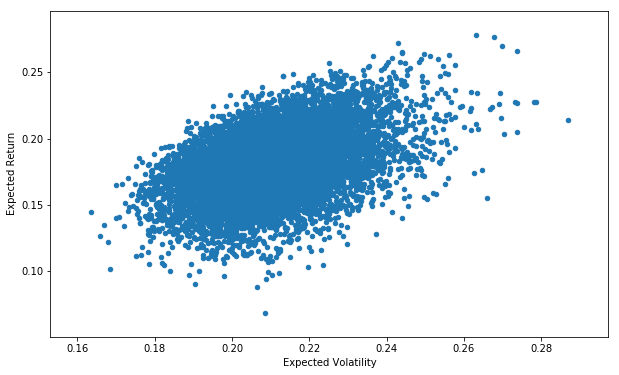

In [44]:
# Efficient Frontier 
pflio_scenarios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

## Best Results so far:
- 30% Return, 25% Volatility: 
    - AMZN - 0.425584
    - AAPL - 0.382721
    - TSLA - 0.098763
    - SPHD - 0.045753
    - JD - 0.035752
    - BABA - 0.011428
    
    
- 31% Return, 25% Volatility:
    - AMZN - 0.727883
    - SPHD - 0.169791
    - JD - 0.033700
    - BABA - 0.030990
    - TSLA - 0.021079
    - AAPL - 0.016557


## Data Visualization

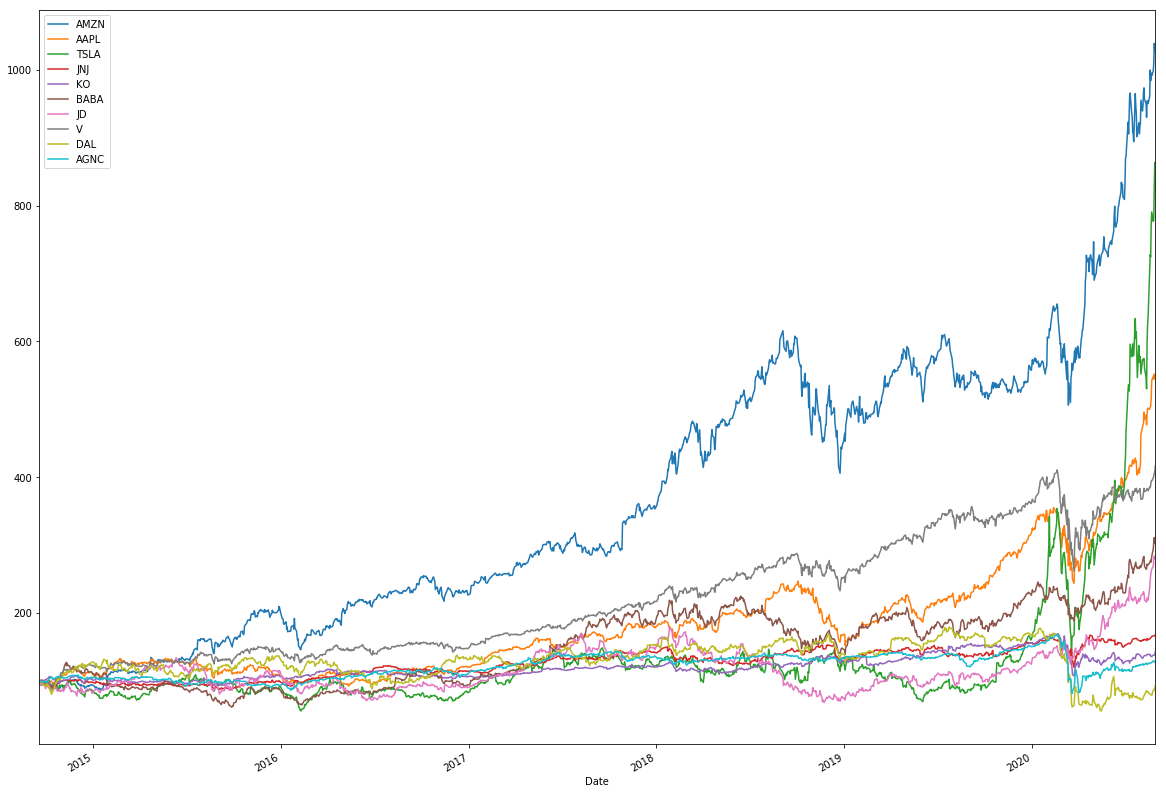

In [45]:
(historical_data/historical_data.iloc[0]*100).plot(figsize=(20,15))

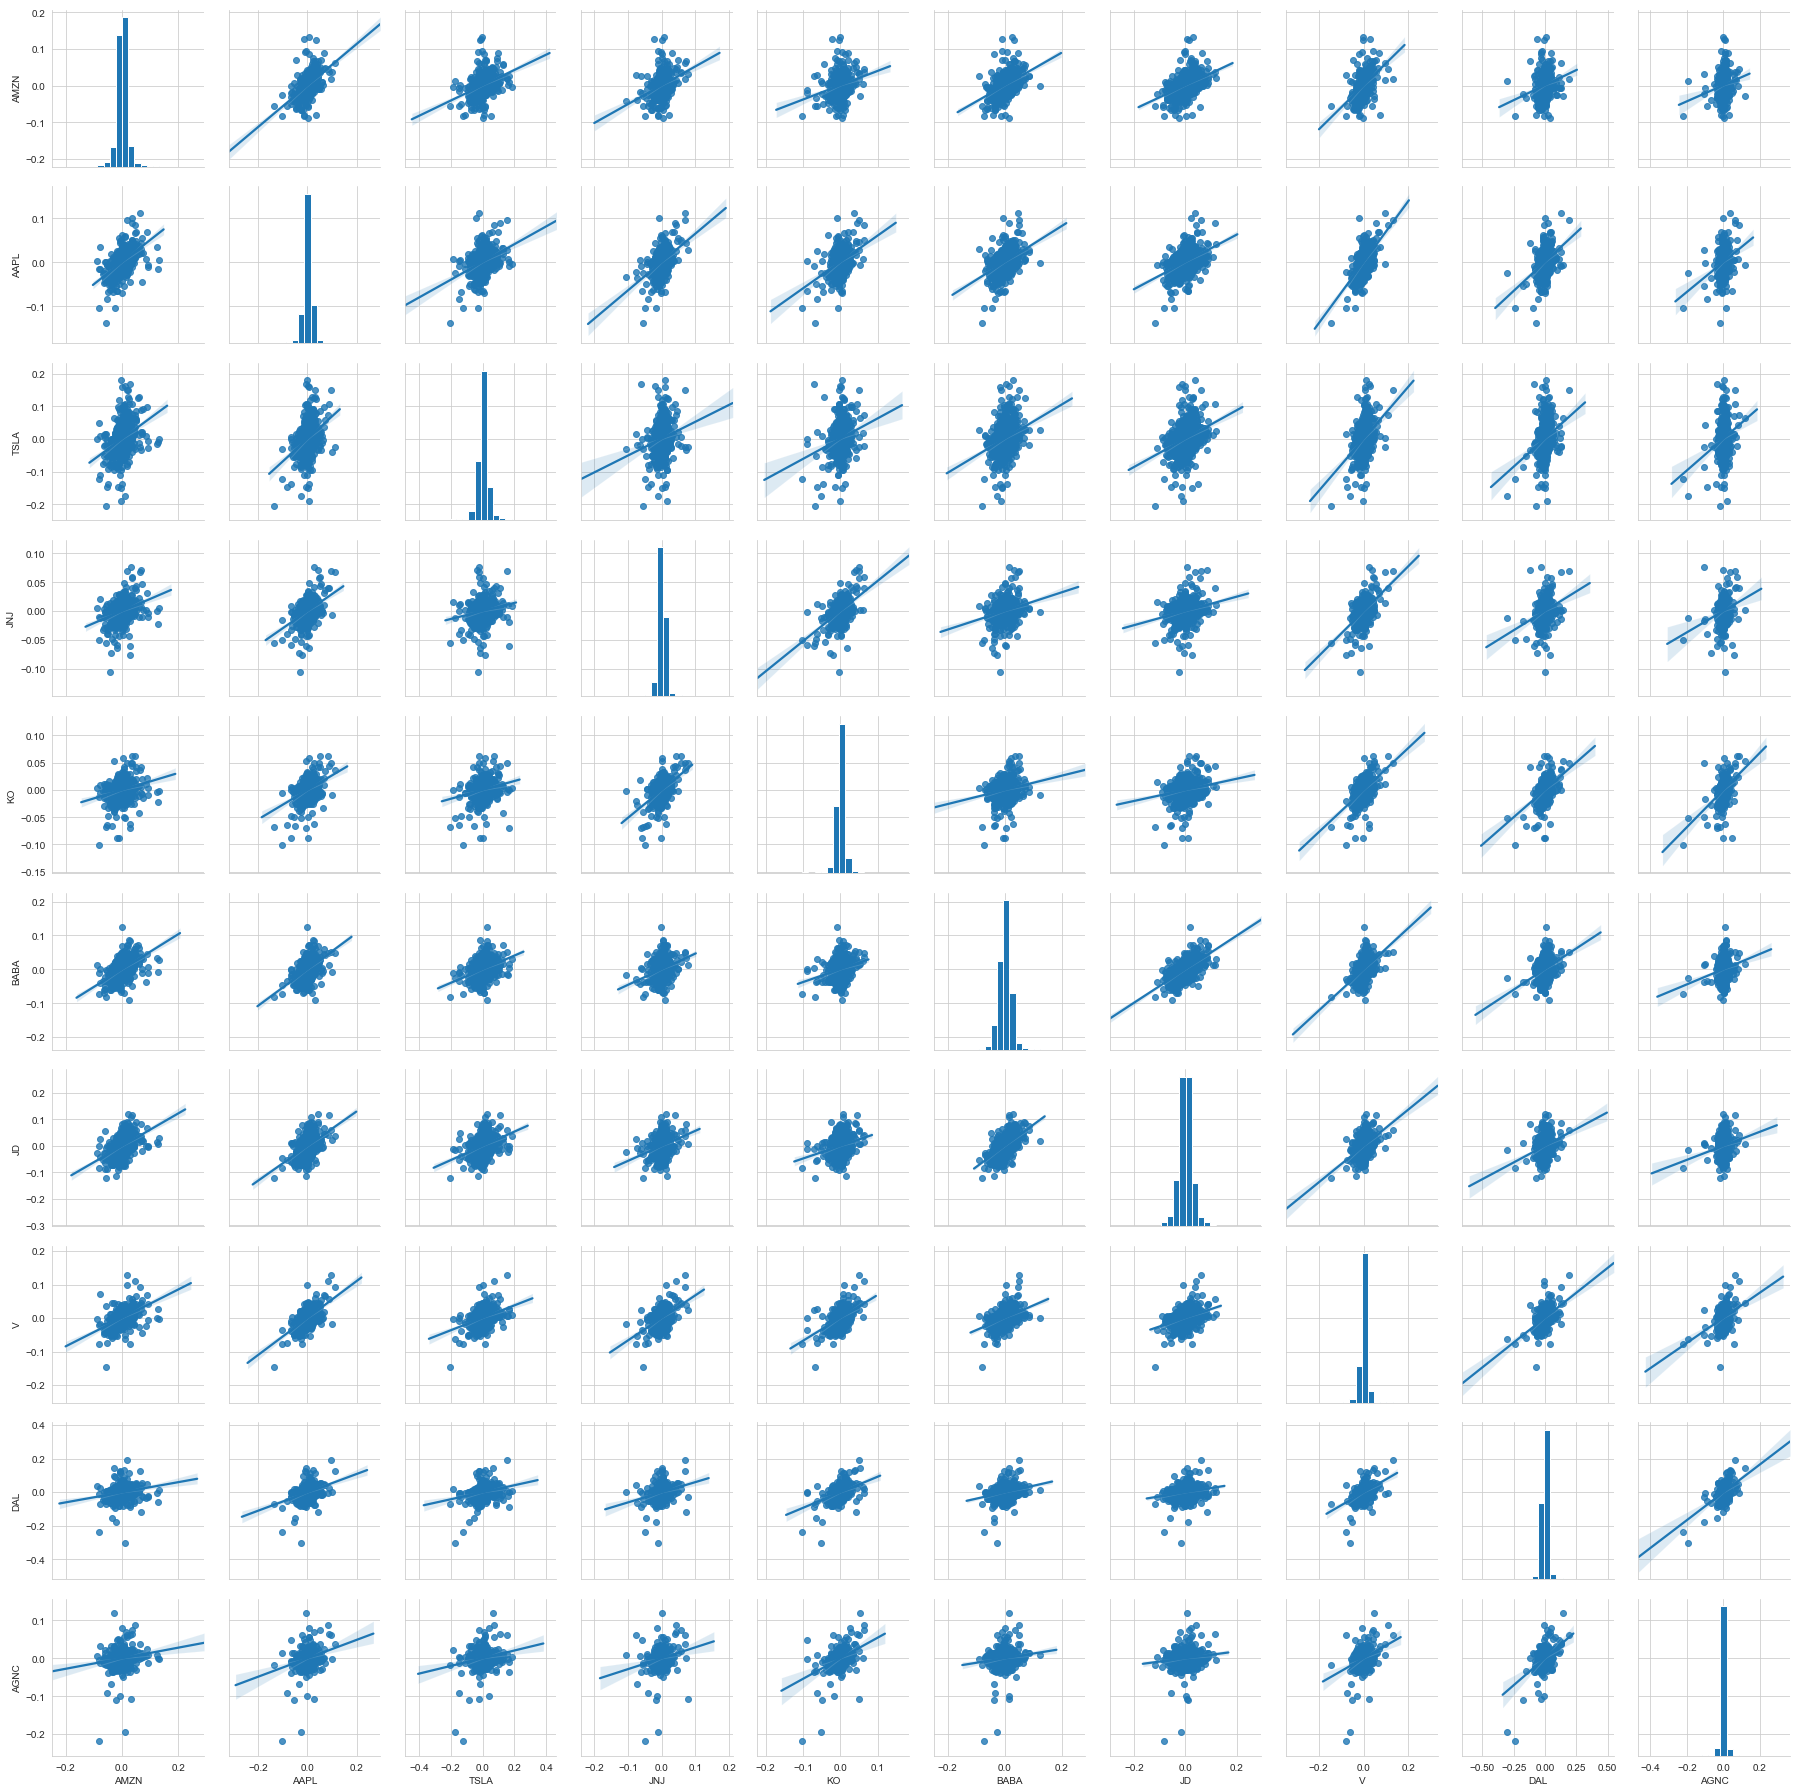

In [46]:
sns.set_style('whitegrid')
regression = sns.pairplot(returns[1:], kind="reg")
regression

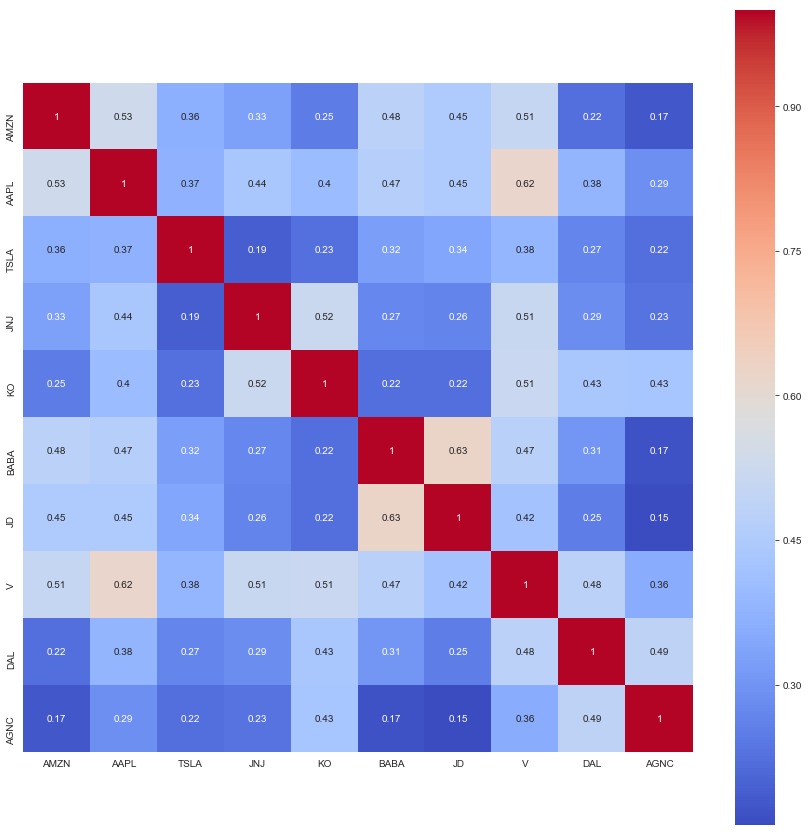

In [47]:
# Excatly -1: Perfect negative relationship 
# -0.70:      Strong negative relationship
# -0.50:      Moderate negative relationship
# -0.30:      Weak negative relationship
#  0.00:      No correlation
# +0.30:      Weak positive relationship
# +0.50:      Moderate positive relationship
# +0.70:      Strong positive relationship
# Exactly +1: Perfect positive relationship

plt.subplots(figsize=(15, 15))
heatmap = sns.heatmap(return_corr, annot=True, square=True, cmap='coolwarm')
heatmap
